<a href="https://colab.research.google.com/github/vini1lol/Treinamento-SVM/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Support Vector Machine 

* **Classificação**
* **Identificar se um determinado cliente compra ou não uma determinado produto**  
* **SUV - Checar essa informação.**  


Fonte: https://www.kaggle.com/sash1563/social-network-ads

In [2]:
# Bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carrega a Base de Dados 

In [3]:
# Leitura da base de dados 
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv"); 
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset = dataset.drop("User ID",axis= 1)
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [7]:
gender= {'Male' :1,'Female':0}
dataset.Gender = [gender[item] for item in dataset.Gender]  
dataset.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Seleciona Atributos 
* Colunas 1 a 3  
* Geneto, idade e salário aproximado 
* Coluna 4
* Compra realizada ou não 

In [11]:
X = dataset.iloc[:,0:3].values
y = dataset.iloc[:,3].values

print("X=",X[0:6,:])
print("y=",y[0:6])

X= [[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 [    0    27 57000]
 [    1    19 76000]
 [    1    27 58000]]
y= [0 0 0 0 0 0]


## Divisão dos dados 
* Organização dos dados em dois conjuntos: treinamento e teste.
* Utilização de 25% para teste e 75% para treino 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 
* A amplitude de variação dos dados nos atributos idade e salário são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos 

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento 
* O modelo escolhido foi a SVM com kernel linear 

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Avaliação do Modelo 
* Uso da métrica de precisão 
* Matriz de Confusão 


In [15]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [16]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )

Acurácia:  89.0 %


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[67  1]
 [10 22]]


## Visualização dos resultados 

In [24]:
from mpl_toolkits import mplot3d

In [53]:
X_set, y_set = X_train, y_train
X_set[y_set==0,0]

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0.])

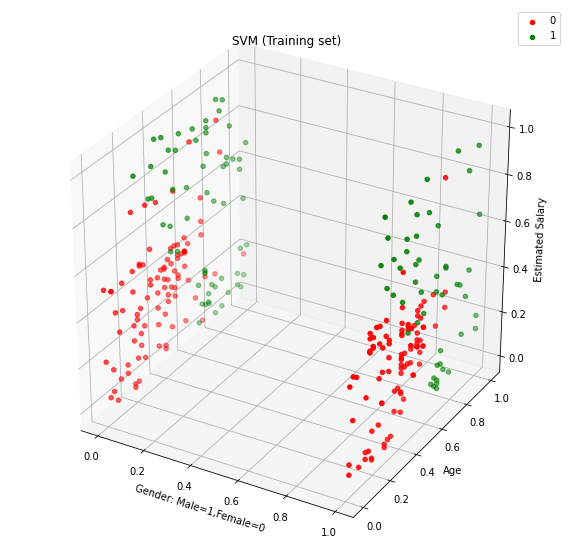

In [66]:
fig= plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Pontos vermelhos e verdes
ax.scatter3D(X_set[y_set==0,0],X_set[y_set==0,1],X_set[y_set==0,2],color='red',label=0)
ax.scatter3D(X_set[y_set==1,0],X_set[y_set==1,1],X_set[y_set==1,2],color='green',label=1)
ax.set_title('SVM (Training set)')
ax.set_xlabel('Gender: Male=1,Female=0')
ax.set_ylabel('Age')
ax.set_zlabel('Estimated Salary')
ax.legend()
# ax.show()